In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_760679.tsv', sep='\t')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,HCT116,A549
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.018,-0.048,0.017,-0.708,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.043,0.191,0.099,-0.262,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.005,0.650,-0.185,0.627,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.762,0.281,0.676,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.455,-0.643,0.066,-0.164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.716,1.309,1.089,NaN,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.544,-0.427,NaN,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.143,-0.195,-0.308,NaN,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.116,-0.084,-0.385,NaN,NaN


In [3]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [4]:
# data_split_dict = {}

# data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
# data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
# data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
# data_split_dict['test']  = MPRA_df['chr'].isin(['chr2'])

# MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
# threshold = np.percentile(MPRA_df['std'].dropna(), 98)
# data_split_dict['diff']  = MPRA_df['std'] > threshold
# data_split_dict['const'] = ~data_split_dict['diff']


# for key in data_split_dict:
#     print(key, data_split_dict[key].sum())

# keys = list(data_split_dict.keys())
# for k1 in keys:
#     for k2 in keys:
#         data_split_dict[f'{k1}+{k2}'] = data_split_dict[k1] & data_split_dict[k2]

In [5]:
# for data_split in ['total', 'diff', 'test', 'test+diff']:
#     pearson_df = pd.DataFrame()
#     for i, c1 in enumerate(cell_types):
#         for j, c2 in enumerate(cell_types):
#                 cond = data_split_dict[data_split]
#                 pred = MPRA_df.loc[cond, f'{c1}']
#                 true = MPRA_df.loc[cond, f'{c2}']
#                 r, _ = pearson(pred, true)
#                 pearson_df.loc[c1, c2] = r
#     print(data_split)
#     print(pearson_df)

In [6]:
VEF_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_VEF_raw.tsv', sep='\t')
VEF_df.describe()

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
count,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,NaN,0.000,-0.000,-0.000,0.000,-0.000,NaN,-0.000,NaN,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000,NaN,-0.000,NaN,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000
min,-3.071,-4.178,-4.665,-5.994,-5.530,-2.963,-1.741,-2.223,-2.539,-3.762,-4.128,-4.924,-4.987,-2.823,NaN,-2.453,-3.506,-4.290,-4.320,-3.525,NaN,-3.342,NaN,-2.462,-3.177,-2.987,-4.315,-3.715,-2.924,-2.844,NaN,-2.212,-3.474,-2.917,-3.403,NaN,-4.443,NaN,-3.275,-2.586
25%,-0.706,-0.689,-0.697,-0.625,-0.686,-0.747,-0.818,-0.673,-0.734,-0.721,-0.702,-0.700,-0.680,-0.782,NaN,-0.691,-0.682,-0.656,-0.645,-0.771,NaN,-0.782,NaN,-0.672,-0.687,-0.701,-0.686,-0.592,-0.721,-0.736,NaN,-0.627,-0.694,-0.677,-0.676,NaN,-0.692,NaN,-0.725,-0.677
50%,-0.202,-0.208,-0.205,-0.039,-0.102,-0.115,-0.316,-0.253,-0.210,-0.234,-0.183,-0.130,-0.071,-0.168,NaN,-0.212,-0.233,-0.248,-0.241,-0.136,NaN,-0.044,NaN,-0.240,-0.191,-0.259,-0.232,-0.175,-0.249,-0.159,NaN,-0.259,-0.145,-0.264,-0.243,NaN,-0.215,NaN,-0.193,-0.221
75%,0.493,0.481,0.495,0.573,0.594,0.641,0.613,0.392,0.543,0.525,0.527,0.636,0.626,0.658,NaN,0.467,0.483,0.388,0.380,0.700,NaN,0.754,NaN,0.412,0.456,0.444,0.448,0.361,0.493,0.619,NaN,0.317,0.497,0.395,0.423,NaN,0.512,NaN,0.561,0.420
max,6.455,5.184,5.623,6.448,4.656,4.533,3.655,8.456,5.766,6.191,6.044,4.098,4.231,4.624,NaN,8.384,5.613,6.558,6.388,4.103,NaN,4.445,NaN,8.475,7.113,6.104,7.072,6.734,4.692,4.500,NaN,9.919,6.630,6.189,6.035,NaN,4.868,NaN,6.659,8.890


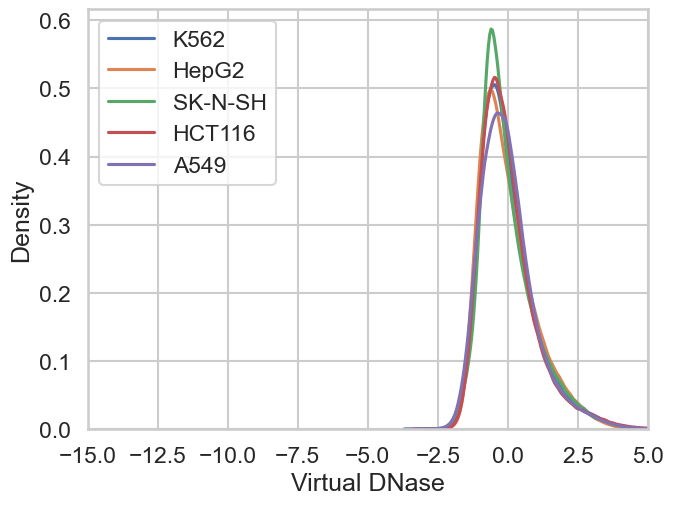

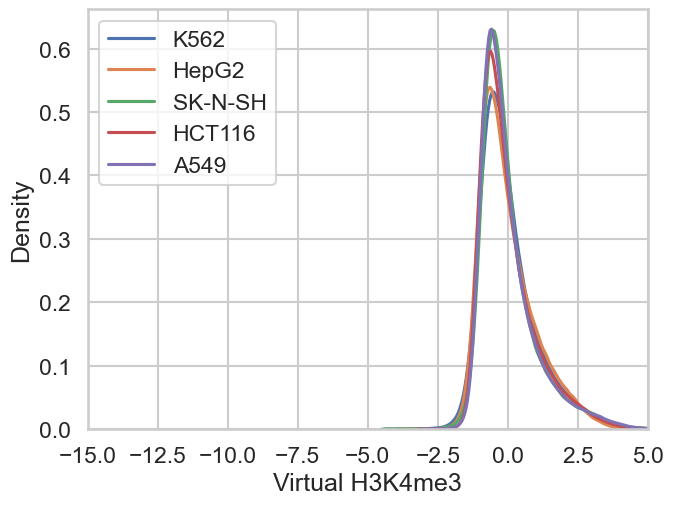

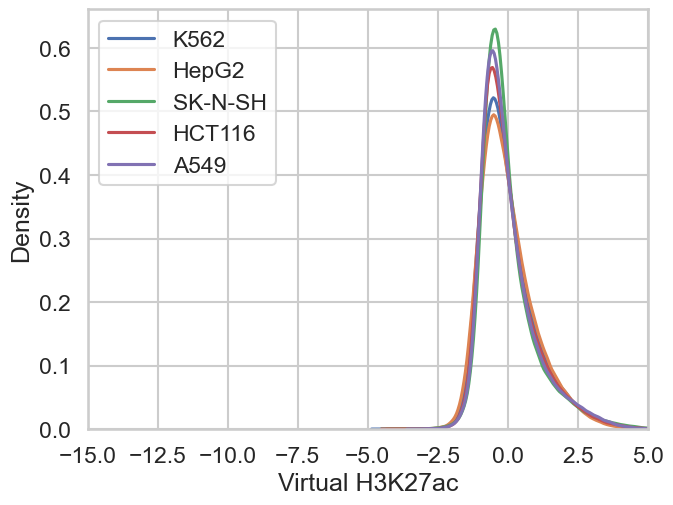

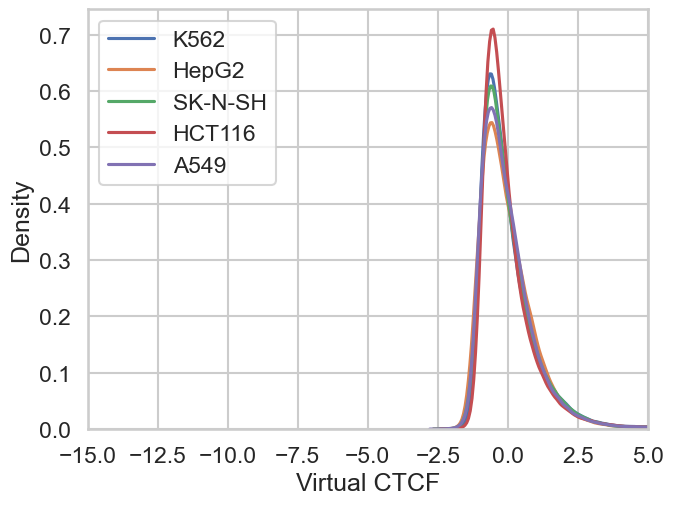

In [7]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=100)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

    for i, cell_type in enumerate(cell_types):
        x = VEF_df[f'{cell_type}_{assay}']
        sns.kdeplot(x, label=cell_type)

    plt.xlim(-15, 5)
    plt.xlabel(f'Virtual {assay}')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_distribution.png', dpi=400)
    plt.savefig(f'figures_pdf/Gosai_MPRA_Sei_{assay}_distribution.pdf', dpi=400)
    plt.show()

In [5]:
VEF_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_VEF_zscore.tsv', sep='\t')
VEF_df.describe()

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
count,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,NaN,0.000,-0.000,-0.000,0.000,-0.000,NaN,-0.000,NaN,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000,NaN,-0.000,NaN,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000
min,-3.071,-4.178,-4.665,-5.994,-5.530,-2.963,-1.741,-2.223,-2.539,-3.762,-4.128,-4.924,-4.987,-2.823,NaN,-2.453,-3.506,-4.290,-4.320,-3.525,NaN,-3.342,NaN,-2.462,-3.177,-2.987,-4.315,-3.715,-2.924,-2.844,NaN,-2.212,-3.474,-2.917,-3.403,NaN,-4.443,NaN,-3.275,-2.586
25%,-0.706,-0.689,-0.697,-0.625,-0.686,-0.747,-0.818,-0.673,-0.734,-0.721,-0.702,-0.700,-0.680,-0.782,NaN,-0.691,-0.682,-0.656,-0.645,-0.771,NaN,-0.782,NaN,-0.672,-0.687,-0.701,-0.686,-0.592,-0.721,-0.736,NaN,-0.627,-0.694,-0.677,-0.676,NaN,-0.692,NaN,-0.725,-0.677
50%,-0.202,-0.208,-0.205,-0.039,-0.102,-0.115,-0.316,-0.253,-0.210,-0.234,-0.183,-0.130,-0.071,-0.168,NaN,-0.212,-0.233,-0.248,-0.241,-0.136,NaN,-0.044,NaN,-0.240,-0.191,-0.259,-0.232,-0.175,-0.249,-0.159,NaN,-0.259,-0.145,-0.264,-0.243,NaN,-0.215,NaN,-0.193,-0.221
75%,0.493,0.481,0.495,0.573,0.594,0.641,0.613,0.392,0.543,0.525,0.527,0.636,0.626,0.658,NaN,0.467,0.483,0.388,0.380,0.700,NaN,0.754,NaN,0.412,0.456,0.444,0.448,0.361,0.493,0.619,NaN,0.317,0.497,0.395,0.423,NaN,0.512,NaN,0.561,0.420
max,6.455,5.184,5.623,6.448,4.656,4.533,3.655,8.456,5.766,6.191,6.044,4.098,4.231,4.624,NaN,8.384,5.613,6.558,6.388,4.103,NaN,4.445,NaN,8.475,7.113,6.104,7.072,6.734,4.692,4.500,NaN,9.919,6.630,6.189,6.035,NaN,4.868,NaN,6.659,8.890


K562 DNase 0.5352326037733501 0.3594640817512562


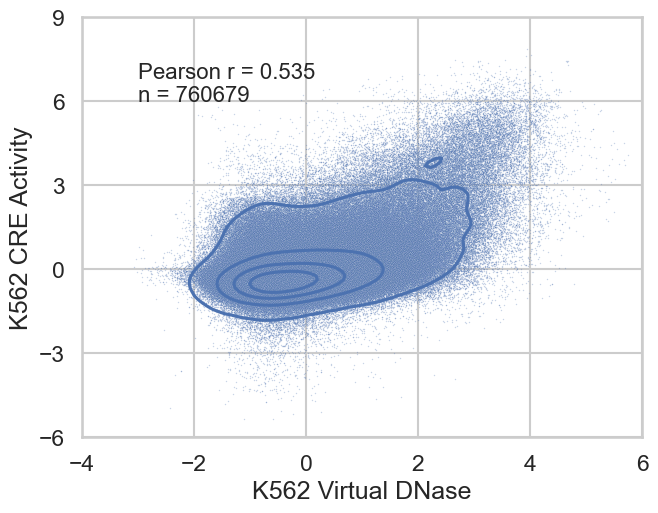

K562 H3K4me3 0.4834098302992007 0.33364016127859975


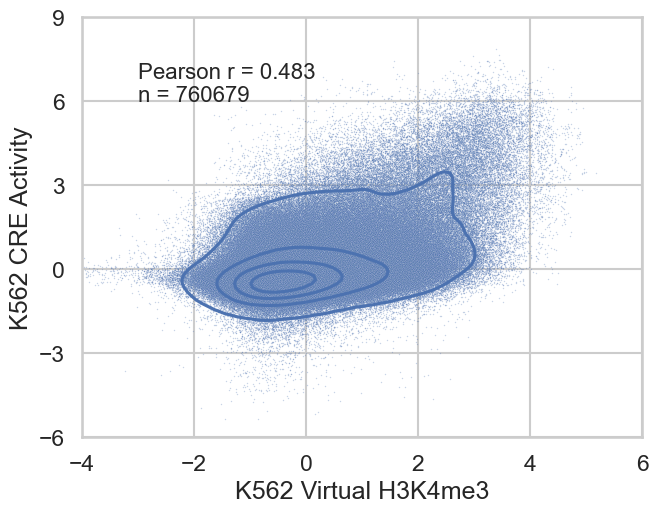

K562 H3K27ac 0.48650635783004836 0.35673685930356513


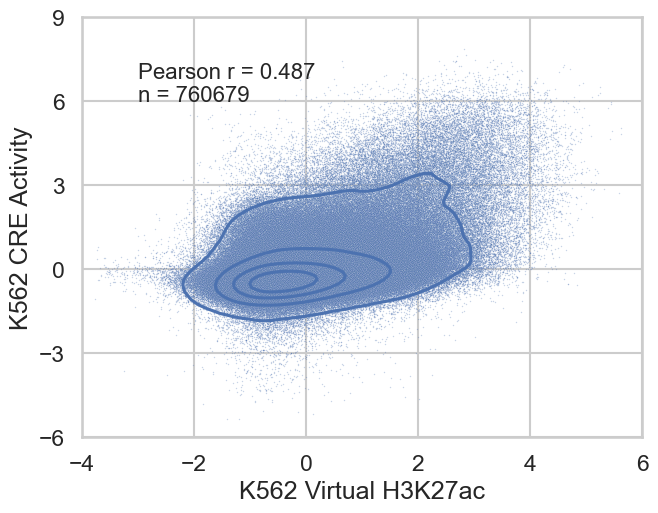

K562 CTCF 0.40006154161957713 0.2719079336281215


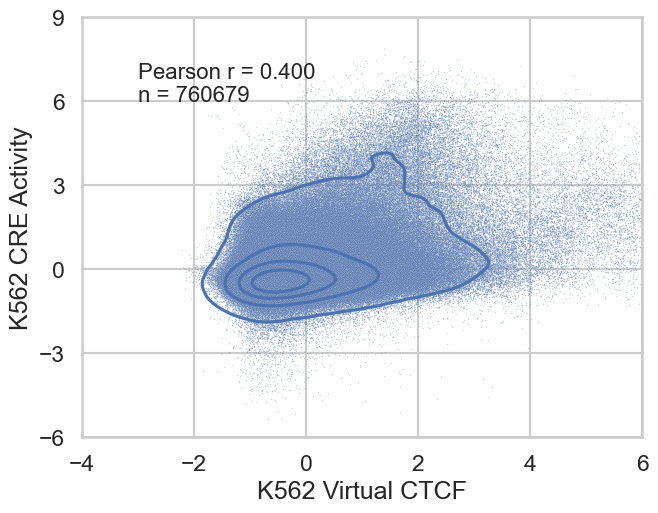

In [6]:
sns.set_theme(context='talk', style='whitegrid')

for cell_type in cell_types[:1]:
    for assay in assays:
        
        fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
        plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

        x = VEF_df[f'{cell_type}_{assay}']
        y = MPRA_df[f'{cell_type}']
        r = pearson(x, y)[0]
        r2 = spearman(x, y)[0]
        print(cell_type, assay, r, r2)

        sns.scatterplot(x=x, y=y, s=1, alpha=0.3, rasterized=True)
        sns.kdeplot(x=x[:50000], y=y[:50000], levels=5, bw_adjust=1.5, gridsize=100)

        ax.text(
            0.1, 0.8, f'Pearson r = {r:.3f}\nn = {len(x)}',
            transform=ax.transAxes, fontsize=16)


        ax.set_xlim(-4, 6)
        ax.set_ylim(-6, 9)
        ax.set_xticks([-4, -2, 0, 2, 4, 6])
        ax.set_yticks([-6, -3, 0, 3, 6, 9])
        ax.set_xlabel(f'{cell_type} Virtual {assay}')
        ax.set_ylabel(f'{cell_type} CRE Activity')

        plt.savefig(f'figures/Gosai_MPRA_Sei_{cell_type}_{assay}_vs_CRE_Activity_scatter.png', dpi=400)
        plt.savefig(f'figures_pdf/Gosai_MPRA_Sei_{cell_type}_{assay}_vs_CRE_Activity_scatter.pdf', dpi=400)

        plt.show()